In [ ]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle

#nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
import nltk
nltk.download("popular")
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
import pandas as pd
# #gensim
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec


#wordcloud
from wordcloud import WordCloud

# #Sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, get_scorer, f1_score,roc_auc_score,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier


#filter warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data] 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read in the data
data =pd.read_csv("/content/drive/MyDrive/yemi_file.csv",encoding="'ISO-8859-1'")
data.head()

,id,User Name,Date Created,Tweets
0,0,ProfOsinbajo,2019-12-25 09:25:21+00:00,I think Mr. President was delighted with his C...
1,1,ProfOsinbajo,2019-12-17 15:56:33+00:00,"By signing the 2020 budget today, President @M..."
2,2,ProfOsinbajo,2019-12-17 15:47:39+00:00,Happy Birthday Mr. President! https://t.co/eh2...
3,3,ProfOsinbajo,2019-12-17 08:15:37+00:00,"Egbon, I must say that your sense of humour, y..."
4,4,ProfOsinbajo,2019-12-11 15:04:02+00:00,"Their roles which include conflict resolution,..."


In [ ]:
# Dropping Unnamed: 0 column
mydata = data.drop(['User Name','id', 'Date Created'], axis=1)
mydata.head()

# mydata = pd.DataFrame(data.review)

,Tweets
0,I think Mr. President was delighted with his C...
1,"By signing the 2020 budget today, President @M..."
2,Happy Birthday Mr. President! https://t.co/eh2...
3,"Egbon, I must say that your sense of humour, y..."
4,"Their roles which include conflict resolution,..."


**Step 1: Cleaning the text**

In [ ]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
mydata['Cleaned Tweets'] = mydata['Tweets'].apply(clean)
mydata.head()

,Tweets,Cleaned Tweets
0,I think Mr. President was delighted with his C...,I think Mr President was delighted with his Ch...
1,"By signing the 2020 budget today, President @M...",By signing the budget today President MBuhari ...
2,Happy Birthday Mr. President! https://t.co/eh2...,Happy Birthday Mr President https t co eh IaCwLmR
3,"Egbon, I must say that your sense of humour, y...",Egbon I must say that your sense of humour you...
4,"Their roles which include conflict resolution,...",Their roles which include conflict resolution ...


**Steps 2-4: Tokenization, POS tagging, stopwords removal**

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

mydata['POS tagged'] = mydata['Cleaned Tweets'].apply(token_stop_pos)
mydata.head()
# mydata['POS tagged'][0]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Tweets,Cleaned Tweets,POS tagged
0,I think Mr. President was delighted with his C...,I think Mr President was delighted with his Ch...,"[(think, v), (Mr, n), (President, n), (delight..."
1,"By signing the 2020 budget today, President @M...",By signing the budget today President MBuhari ...,"[(signing, v), (budget, n), (today, n), (Presi..."
2,Happy Birthday Mr. President! https://t.co/eh2...,Happy Birthday Mr President https t co eh IaCwLmR,"[(Happy, a), (Birthday, n), (Mr, n), (Presiden..."
3,"Egbon, I must say that your sense of humour, y...",Egbon I must say that your sense of humour you...,"[(Egbon, n), (must, None), (say, v), (sense, n..."
4,"Their roles which include conflict resolution,...",Their roles which include conflict resolution ...,"[(roles, n), (include, v), (conflict, a), (res..."


**Step 5: Obtaining the stem words**

**Lemmatization**

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

mydata['Lemma'] = mydata['POS tagged'].apply(lemmatize)
mydata.head()
# print(mydata['review'][239] + "\n" + mydata['Lemma'][239])

,Tweets,Cleaned Tweets,POS tagged,Lemma
0,I think Mr. President was delighted with his C...,I think Mr President was delighted with his Ch...,"[(think, v), (Mr, n), (President, n), (delight...",think Mr President delight Christmas gift ht...
1,"By signing the 2020 budget today, President @M...",By signing the budget today President MBuhari ...,"[(signing, v), (budget, n), (today, n), (Presi...",sign budget today President MBuhari restore ...
2,Happy Birthday Mr. President! https://t.co/eh2...,Happy Birthday Mr President https t co eh IaCwLmR,"[(Happy, a), (Birthday, n), (Mr, n), (Presiden...",Happy Birthday Mr President https co eh IaCwLmR
3,"Egbon, I must say that your sense of humour, y...",Egbon I must say that your sense of humour you...,"[(Egbon, n), (must, None), (say, v), (sense, n...",Egbon must say sense humour youthfulness she...
4,"Their roles which include conflict resolution,...",Their roles which include conflict resolution ...,"[(roles, n), (include, v), (conflict, a), (res...",role include conflict resolution judicial ga...


In [ ]:
mydata[['Tweets', 'Lemma']]

,Tweets,Lemma
0,I think Mr. President was delighted with his C...,think Mr President delight Christmas gift ht...
1,"By signing the 2020 budget today, President @M...",sign budget today President MBuhari restore ...
2,Happy Birthday Mr. President! https://t.co/eh2...,Happy Birthday Mr President https co eh IaCwLmR
3,"Egbon, I must say that your sense of humour, y...",Egbon must say sense humour youthfulness she...
4,"Their roles which include conflict resolution,...",role include conflict resolution judicial ga...
...,...,...
695,"Yesterday, I summoned and held an emergency me...",Yesterday summon hold emergency meeting top ...
696,The perpetrators of these attacks and acts of ...,perpetrator attack act violence bring book
697,"With great sorrow, I offer my condolences to t...",great sorrow offer condolence victim violent...
698,"The Aso Villa Newsletter, The Budget Edition\n...",Aso Villa Newsletter Budget Edition https co...


**Sentiment analysis using TextBlob**

In [ ]:
from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the tweets
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
fin_data = pd.DataFrame(mydata[['Tweets', 'Lemma']])

In [ ]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity)
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity)
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,Tweets,Lemma,Polarity,Analysis
0,I think Mr. President was delighted with his C...,think Mr President delight Christmas gift ht...,0.000000,Neutral
1,"By signing the 2020 budget today, President @M...",sign budget today President MBuhari restore ...,0.000000,Neutral
2,Happy Birthday Mr. President! https://t.co/eh2...,Happy Birthday Mr President https co eh IaCwLmR,0.800000,Positive
3,"Egbon, I must say that your sense of humour, y...",Egbon must say sense humour youthfulness she...,-0.166667,Negative
4,"Their roles which include conflict resolution,...",role include conflict resolution judicial ga...,0.000000,Neutral


In [ ]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts


Positive    382
Neutral     221
Negative     97
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7fc7ba1a2590>,
 [Text(-0.15743464066966992, 1.088675495231344, 'Positive'),
  Text(-0.3163593898140119, -1.053525859424678, 'Neutral'),
  Text(1.2240838666145646, -0.5693142256205592, 'Negative')],
 [Text(-0.0858734403652745, 0.5938229973989149, '54.6%'),
  Text(-0.17255966717127919, -0.574650468777097, '31.6%'),
  Text(0.7707194715721332, -0.3584571050203521, '13.9%')])

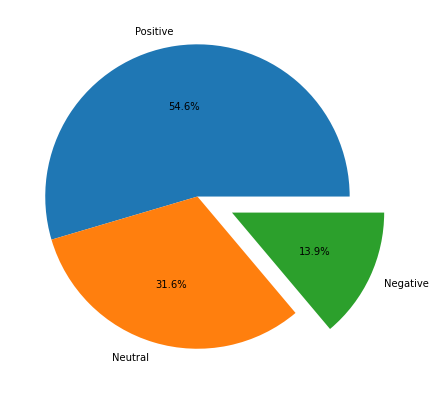

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
# plt.legend()

**Sentiment analysis using (Valence Aware Dictionary and Sentiment Reasoner) VADER**

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 22.7 MB/s 


In [ ]:
 #function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,Tweets,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,I think Mr. President was delighted with his C...,think Mr President delight Christmas gift ht...,0.000000,Neutral,0.7783,Positive
1,"By signing the 2020 budget today, President @M...",sign budget today President MBuhari restore ...,0.000000,Neutral,0.7096,Positive
2,Happy Birthday Mr. President! https://t.co/eh2...,Happy Birthday Mr President https co eh IaCwLmR,0.800000,Positive,0.5719,Positive
3,"Egbon, I must say that your sense of humour, y...",Egbon must say sense humour youthfulness she...,-0.166667,Negative,0.9001,Positive
4,"Their roles which include conflict resolution,...",role include conflict resolution judicial ga...,0.000000,Neutral,0.7650,Positive


In [ ]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Neutral     343
Positive    313
Negative     44
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7fc7ba382810>,
 [Text(0.03769287495881983, 1.1994078735681784, 'Neutral'),
  Text(-0.24958345405675475, -1.0713113923883661, 'Positive'),
  Text(1.0786223793203689, -0.2158095522196977, 'Negative')],
 [Text(0.0219875103926449, 0.6996545929147706, '49.0%'),
  Text(-0.13613642948550259, -0.5843516685754724, '44.7%'),
  Text(0.5883394796292921, -0.11771430121074418, '6.3%')])

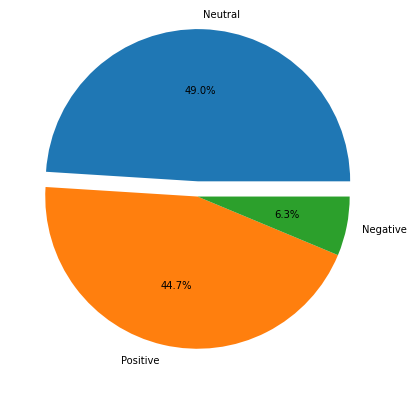

In [ ]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
# plt.legend()

**Sentiment Analysis using SentiWordNet**

In [ ]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue

        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

fin_data['SWN analysis'] = mydata['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


,Tweets,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,I think Mr. President was delighted with his C...,think Mr President delight Christmas gift ht...,0.000000,Neutral,0.7783,Positive,Positive
1,"By signing the 2020 budget today, President @M...",sign budget today President MBuhari restore ...,0.000000,Neutral,0.7096,Positive,Negative
2,Happy Birthday Mr. President! https://t.co/eh2...,Happy Birthday Mr President https co eh IaCwLmR,0.800000,Positive,0.5719,Positive,Positive
3,"Egbon, I must say that your sense of humour, y...",Egbon must say sense humour youthfulness she...,-0.166667,Negative,0.9001,Positive,Positive
4,"Their roles which include conflict resolution,...",role include conflict resolution judicial ga...,0.000000,Neutral,0.7650,Positive,Positive


In [ ]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Positive    461
Negative    150
Neutral      89
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7fc7b4c137d0>,
 [Text(-0.5733791550197872, 1.0541519551700291, 'Positive'),
  Text(0.10843292723424619, -1.09464254452831, 'Negative'),
  Text(1.0134106322672563, -0.4277836958179684, 'Neutral')],
 [Text(-0.33447117376154245, 0.6149219738491837, '65.9%'),
  Text(0.059145233036861554, -0.5970777515608962, '21.4%'),
  Text(0.5527694357821397, -0.23333656135525546, '12.7%')])

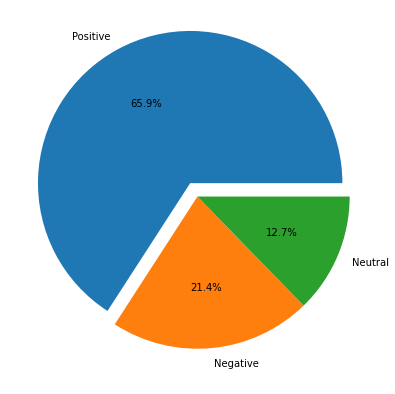

In [ ]:
swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
# plt.legend()

Visual representation of TextBlob, VADER, SentiWordNet results

([<matplotlib.patches.Wedge at 0x7fc7b4b09f50>,
 [Text(-0.5255975587681383, 0.9663059589058601, 'Positive'),
  Text(0.10843292723424619, -1.09464254452831, 'Negative'),
  Text(1.2437312305098145, -0.5250072630493248, 'Neutral')],
 [Text(-0.28668957750989355, 0.5270759775850146, '65.9%'),
  Text(0.059145233036861554, -0.5970777515608962, '21.4%'),
  Text(0.7830900340246979, -0.3305601285866119, '12.7%')])

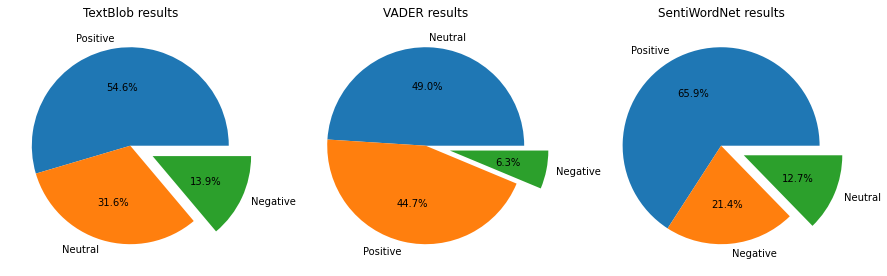

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

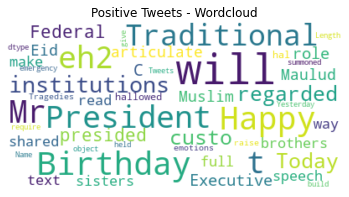

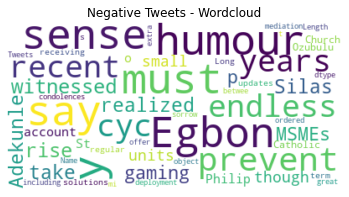

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Wordcloud with positive tweets
positive_tweets = fin_data['Tweets'][fin_data["Analysis"] == 'Positive']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with negative tweets
negative_tweets = fin_data['Tweets'][fin_data["Analysis"] == 'Negative']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()